In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from  sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras import models,layers

from wordcloud import WordCloud, STOPWORDS

import os

In [11]:
imdb_dir = '../aclimdb/'
train_dir = os.path.join(imdb_dir,'train')
test_dir = os.path.join(imdb_dir,'test')
labels = []
texts = []

test_labels = []
test_texts = []

# Training set
for label_type in ['pos','neg']:
    dir_name = os.path.join(train_dir,label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name,fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
# Test set
for label_type in ['pos','neg']:
    dir_name = os.path.join(test_dir,label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name,fname))
            test_texts.append(f.read())
            f.close()
            if label_type == 'neg':
                test_labels.append(0)
            else:
                test_labels.append(1)
print('Length of texts is {}'.format(len(texts)))
print('Length of labels id {}'.format(len(labels)))
print(f'Length of test_texts is {len(test_texts)}')
print(f'Length of test_labels is {len(test_labels )}')

Length of texts is 25000
Length of labels id 25000
Length of test_texts is 25000
Length of test_labels is 25000


In [10]:
texts_df = pd.DataFrame({'texts': texts,
                        'labels':labels})
texts_df.head()

,labels,texts
0,1,For a movie that gets no respect there sure ar...
1,1,Bizarre horror movie filled with famous faces ...
2,1,"A solid, if unremarkable film. Matthau, as Ein..."
3,1,It's a strange feeling to sit alone in a theat...
4,1,"You probably all already know this by now, but..."


In [ ]:
positive = texts_df[texts_df['labels']==1]['texts']
negative = texts_df[texts_df['labels']==0]['texts']

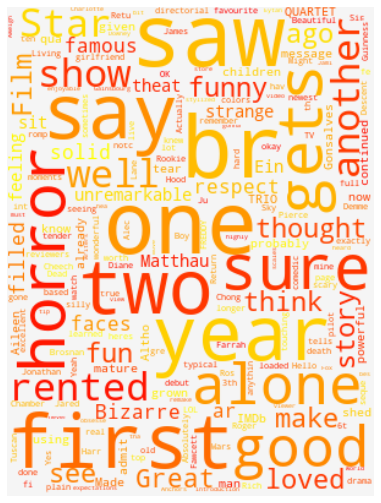

In [63]:
stopwords = set(STOPWORDS)
stopwords.update(["movie", "movies", "film", "seen"])
wordcloud = WordCloud(width=300, height=400,
                      background_color='whitesmoke',
                      stopwords=stopwords,
                      max_words=200,
                      max_font_size=70, 
                      random_state=42,
                      colormap='autumn'
                     ).generate(str(positive))

print(wordcloud)
fig = plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

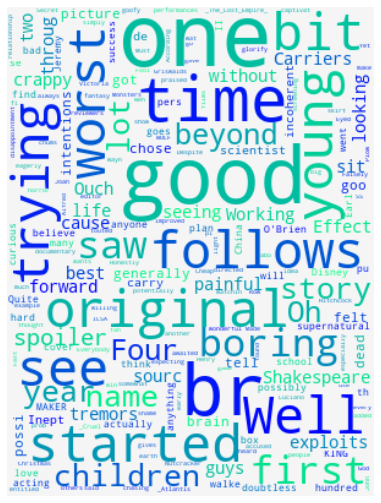

In [62]:
wordcloud = WordCloud(width=300, height=400,
                      background_color='whitesmoke',
                      stopwords=stopwords,
                      max_words=200,
                      max_font_size=70, 
                      random_state=42,
                      colormap='winter'
                     ).generate(str(negative))

print(wordcloud)
fig = plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [34]:
positive

0        For a movie that gets no respect there sure ar...
1        Bizarre horror movie filled with famous faces ...
2        A solid, if unremarkable film. Matthau, as Ein...
3        It's a strange feeling to sit alone in a theat...
4        You probably all already know this by now, but...
5        I saw the movie with two grown children. Altho...
6        You're using the IMDb.<br /><br />You've given...
7        This was a good film with a powerful message o...
8        Made after QUARTET was, TRIO continued the qua...
9        For a mature man, to admit that he shed a tear...
10       Aileen Gonsalves, my girlfriend, is in this fi...
11       Jonathan Demme's directorial debut for Roger C...
12       When I rented this movie to watch it, I knew t...
13       It's hard to say sometimes why exactly a film ...
14       Yes, this gets the full ten stars. It's plain ...
15       Hello. This movie is.......well.......okay. Ju...
16       This is a film that was very well done. I had .